In [32]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
from sklearn.preprocessing import minmax_scale
from statsmodels.tsa.stattools import coint
today = datetime.today().strftime("%Y%m%d") 
# start = (datetime.today() - timedelta()).strftime("%Y%m%d") 
# print(start, today)
pd.options.display.float_format = '{:.6f}'.format

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd bidask

[Errno 2] No such file or directory: 'bidask'
/content/drive/My Drive/algorithmtrading/pair_trading/bidask


In [ ]:
def one_day(temp,test_day):
    
    begin = np.where( np.array(temp.index) > str(test_day))[0][0]
    end = np.where( str(test_day+1) > np.array(temp.index) )[0][-1]
    
    if len(temp.iloc[begin:end])==0:
        print(test_day,'는 공휴일 입니다.')
    else:
        return temp.iloc[begin:end]

# - 과거 1분단위 데이터 받아오기

In [ ]:
now = '20210109'

kodex200 = pd.read_pickle('kodex200_'+now)
kodex_inv = pd.read_pickle('kodexinv_'+now)

temp =  pd.merge(left = kodex200 , right = kodex_inv, how = "inner", on = "체결시간")
temp = temp.set_index('체결시간')
temp.columns = ['kodex200','volume','kodex_inv','volume']
temp = temp[['kodex200','kodex_inv']]

temp['kodex200']=pd.to_numeric(temp['kodex200'])
temp['kodex_inv']=pd.to_numeric(temp['kodex_inv'])
temp['kodex_inv'] = temp['kodex_inv']*11
temp['spread'] = temp['kodex200'] + temp['kodex_inv']
temp['ma60_spread'] = temp['spread'].rolling(window=60, center=False).mean()

temp

kodex200  kodex_inv  spread  ma60_spread
체결시간                                                    
20201223090002     36785      50490   87275          nan
20201223090002     36785      50490   87275          nan
20201223090002     36780      50490   87270          nan
20201223090002     36780      50490   87270          nan
20201223090002     36775      50490   87265          nan
...                  ...        ...     ...          ...
20210108151951     43590      42350   85940 85919.083333
20210108151954     43590      42350   85940 85919.583333
20210108151956     43590      42350   85940 85920.000000
20210108151956     43590      42350   85940 85920.333333
20210108151958     43545      42350   85895 85919.833333

[34545 rows x 4 columns]

# - 일 단위로 데이터 저장하기 + 당일 수익률 계산

In [ ]:
df = {}
calender = []
for date in range(20210101,20210109):
    temps = pd.DataFrame()
    temps = one_day(temp,date)
    try:      
        # ratio  = int((temps['kodex200'] / temps['kodex_inv']).mean)
        temps['ma60_mean'] = temps['spread'].rolling(window=60, center=False).mean()
        temps['ma60_std'] = temps['spread'].rolling(window=60, center=False).std()
        temps['ma60_zscore'] = (temps['spread'] - temps['ma60_mean']) / temps['ma60_std']
        df[str(date)] = temps
        if len(temps) != 0:
            calender.append(str(date))
    except:
        pass
calender

20210101 는 공휴일 입니다.
20210102 는 공휴일 입니다.
20210103 는 공휴일 입니다.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

['20210104', '20210105', '20210106', '20210107', '20210108']

# 그래프 그리기

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_te

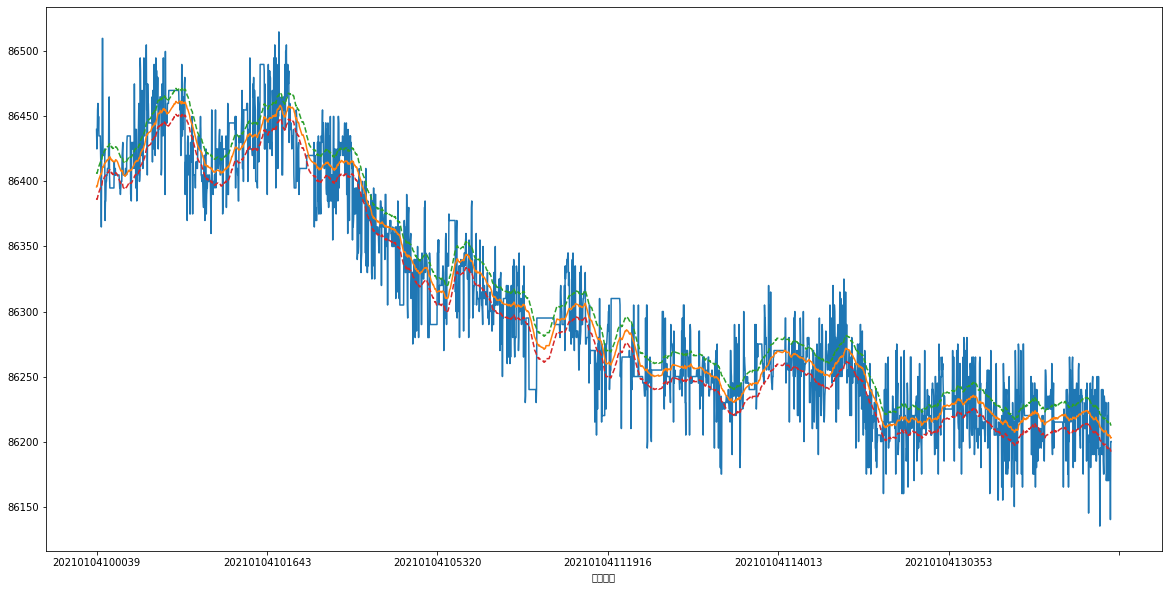

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_te

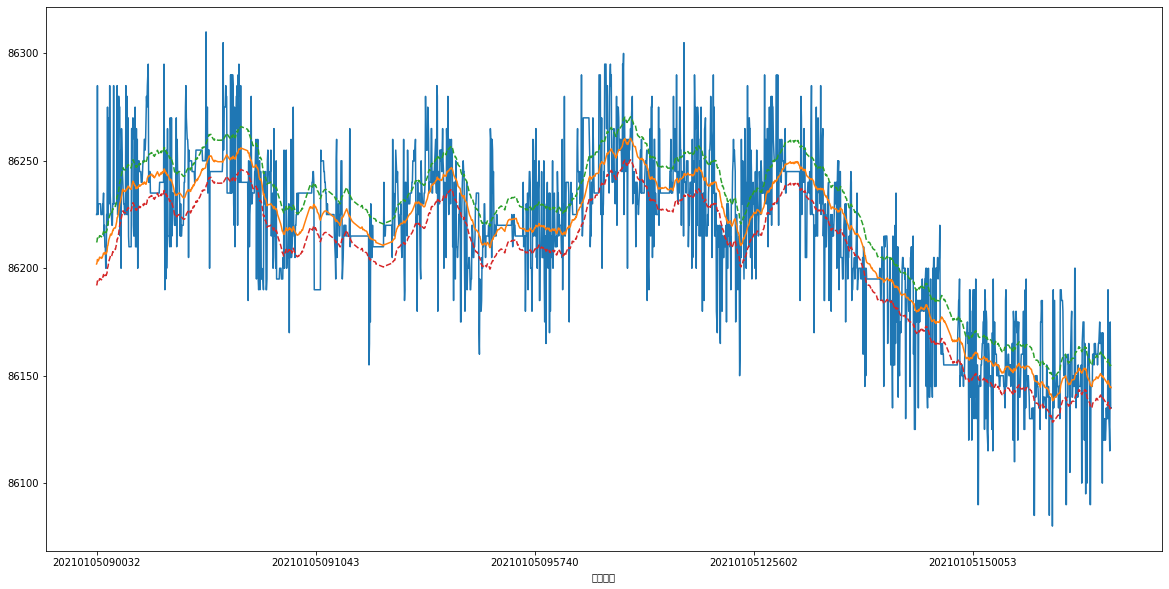

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_te

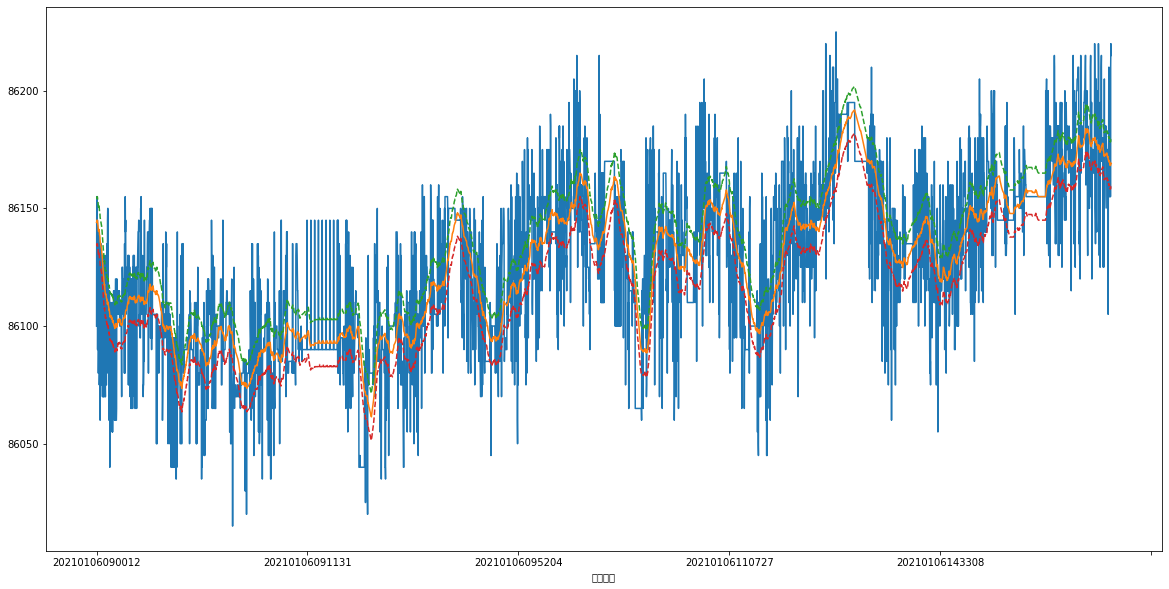

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_te

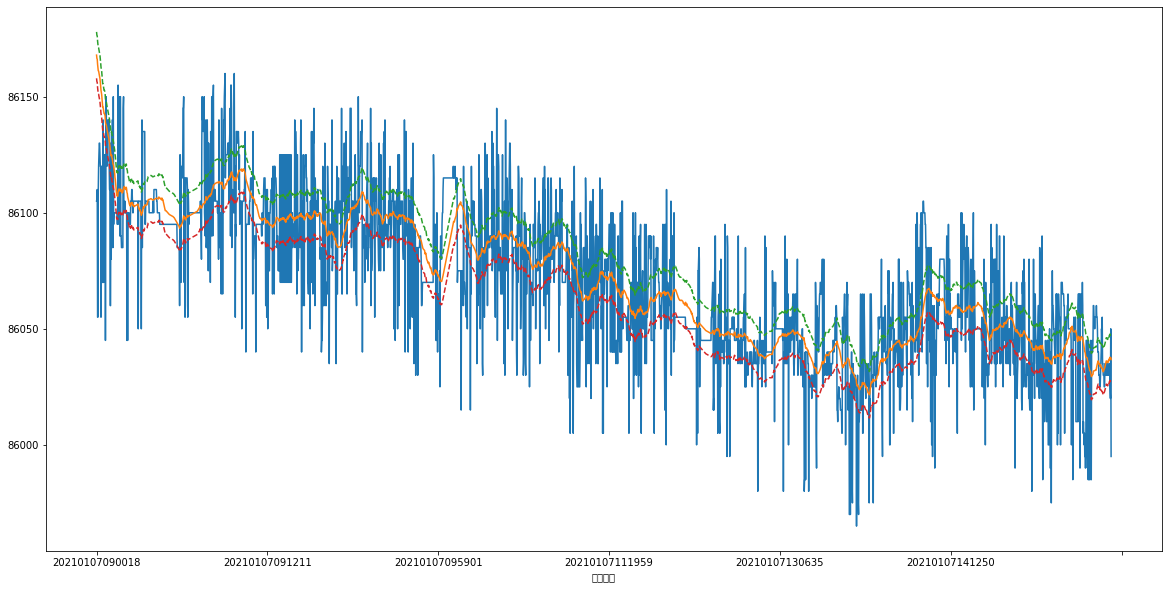

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_te

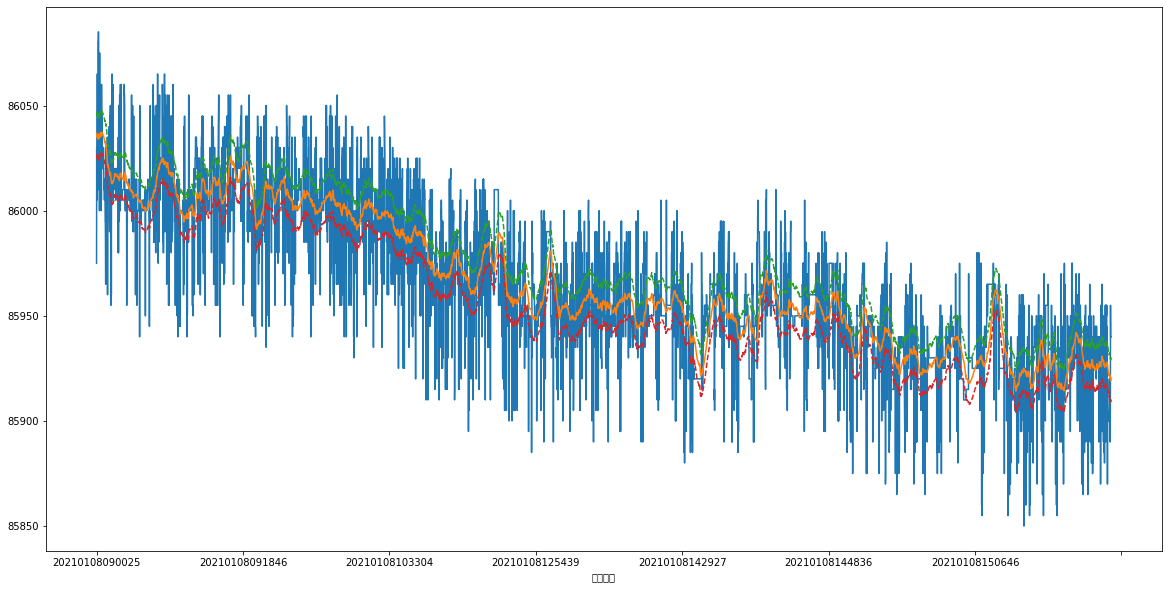

In [ ]:
for date in calender:
    plt.rcParams["figure.figsize"] = (20, 10)
    df[date]['spread'].plot()
    df[date]['ma60_spread'].plot()
    temp_high = df[date]['ma60_spread'] +10
    temp_low = df[date]['ma60_spread']-10
    temp_high.plot(linestyle='--')
    temp_low.plot(linestyle='--')
    # df[date]['kodex200'].plot()
    # df[date]['kodex_inv'].plot()
    # plt.axhline((0.0003), color='red', linestyle='--')
    # plt.axhline((-0.0003), color='red', linestyle='--')
    plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_te

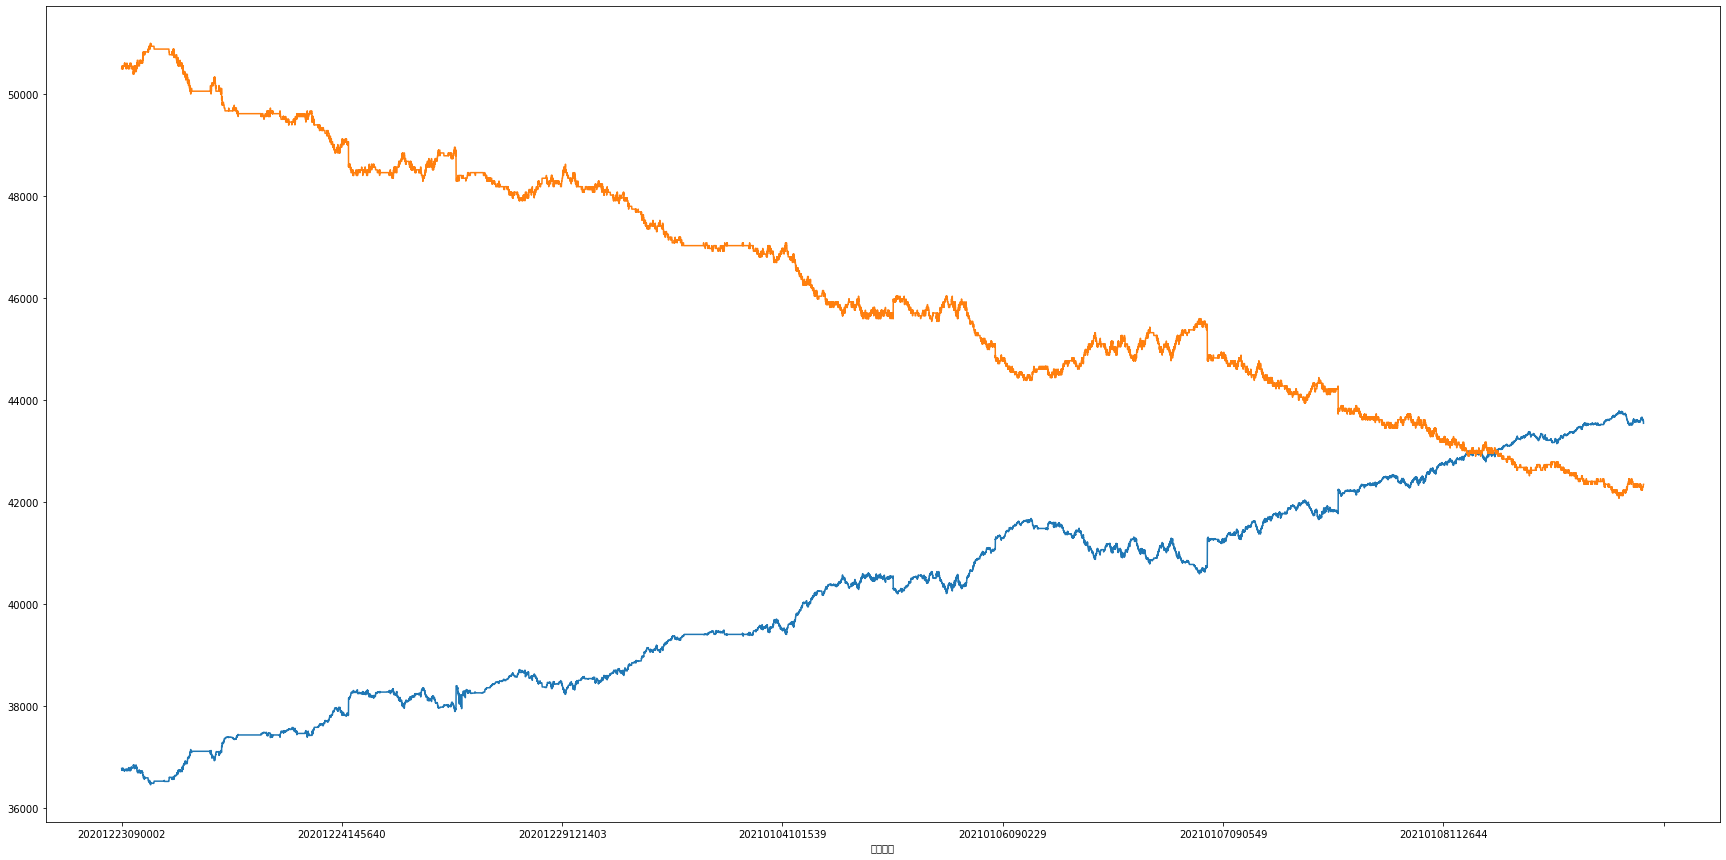

In [ ]:
plt.rcParams["figure.figsize"] = (30, 15)
# temp['kodex200_cumret'].plot()
# temp['kodex_active_cumret'].plot()
# temp['tiger_active_cumret'].plot()
temp['kodex200'].plot()
temp['kodex_inv'].plot()
# temp['ma30'].plot()

# 4. 스프레드 확인

In [34]:
cd bidask

[Errno 2] No such file or directory: 'bidask'
/content/drive/My Drive/algorithmtrading/pair_trading/bidask


In [35]:
now = '20210128'

kodex_inv_bidask = pd.read_pickle('KODEX 인버스_'+now)
tiger_inv_bidask = pd.read_pickle('TIGER 인버스_'+now)

# kodex_inv_bidask = kodex_inv_bidask.reset_index()[['bid','ask']]
# tiger_inv_bidask = tiger_inv_bidask.reset_index()[['bid','ask']]
# bidask = pd.concat([kodex_inv_bidask,tiger_inv_bidask],axis=1)
bidask =  pd.merge(left = kodex_inv_bidask , right = tiger_inv_bidask, how = "inner", on = "time")
bidask.columns = ['kodex_inv_bid','kodex_inv_ask','tiger_inv_bid','tiger_inv_ask']
kodex_inv_ask = bidask['kodex_inv_ask']
kodex_inv_bid = bidask['kodex_inv_bid']
tiger_inv_ask = bidask['tiger_inv_ask']
tiger_inv_bid = bidask['tiger_inv_bid']
bidask

kodex_inv_bid  kodex_inv_ask  tiger_inv_bid  tiger_inv_ask
time                                                              
153011           3975           3970           4380           4370
153007           3975           3970           4385           4380
153004           3975           3970           4380           4370
153000           3975           3970           4385           4380
152934           3975           3970           4385           4380
...               ...            ...            ...            ...
90237            3985           3980           4380           4375
90143            3990           3985           4390           4380
90140            3990           3985           4385           4380
90139            3990           3985           4385           4380
90040            3990           3985           4395           4390

[629 rows x 4 columns]

## - bidask 스프레드

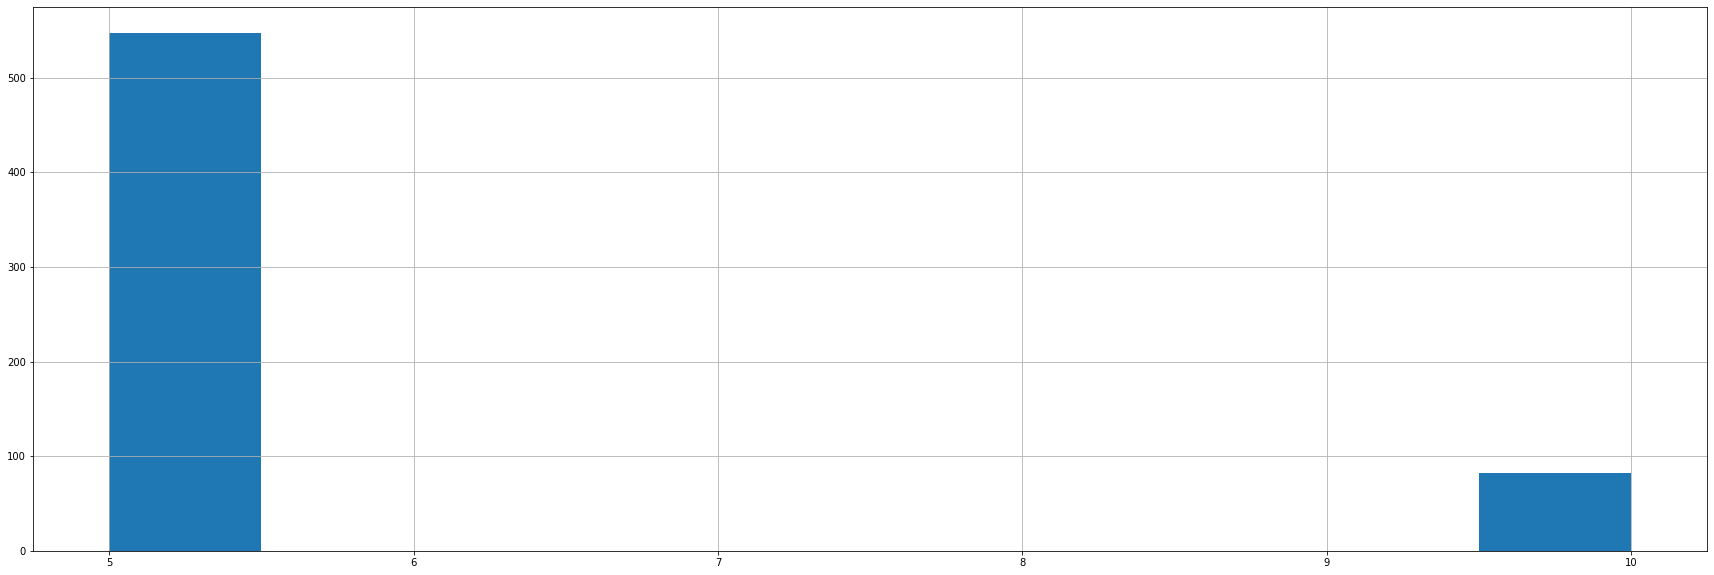

In [36]:
plt.rcParams["figure.figsize"] = (30, 10)
bidask_spread = tiger_inv_bid-tiger_inv_ask
bidask_spread.hist()

# tiger_inv_ask_kodex_inv_bid spread freaquency    (청산포지션)

-410    350
-405    187
-415     82
-400     10
dtype: int64


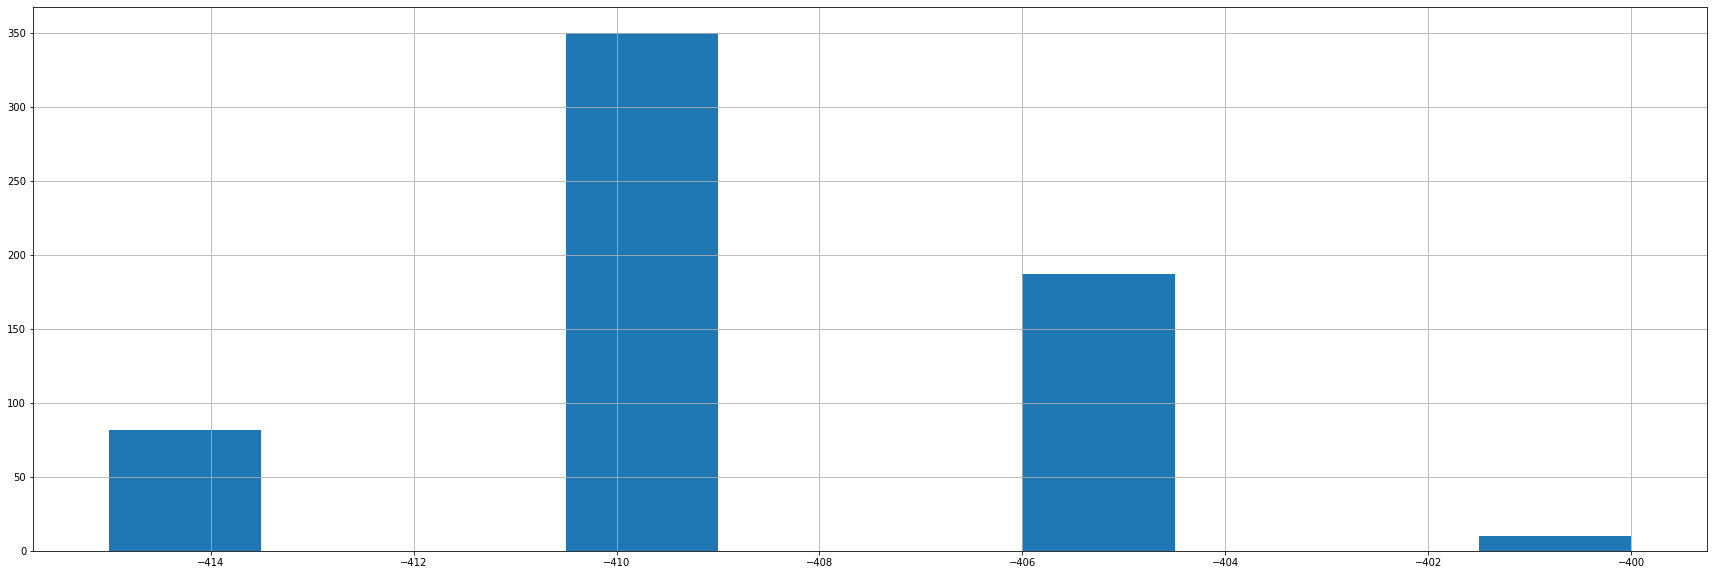

In [37]:
finish = kodex_inv_ask - tiger_inv_bid
finish.hist()
finish = finish.value_counts() 
print(finish[:30])

# kodex_inv_ask_tiger_inv_bid spread freaquency (포지션시작)

400    318
395    233
405     59
390     19
dtype: int64


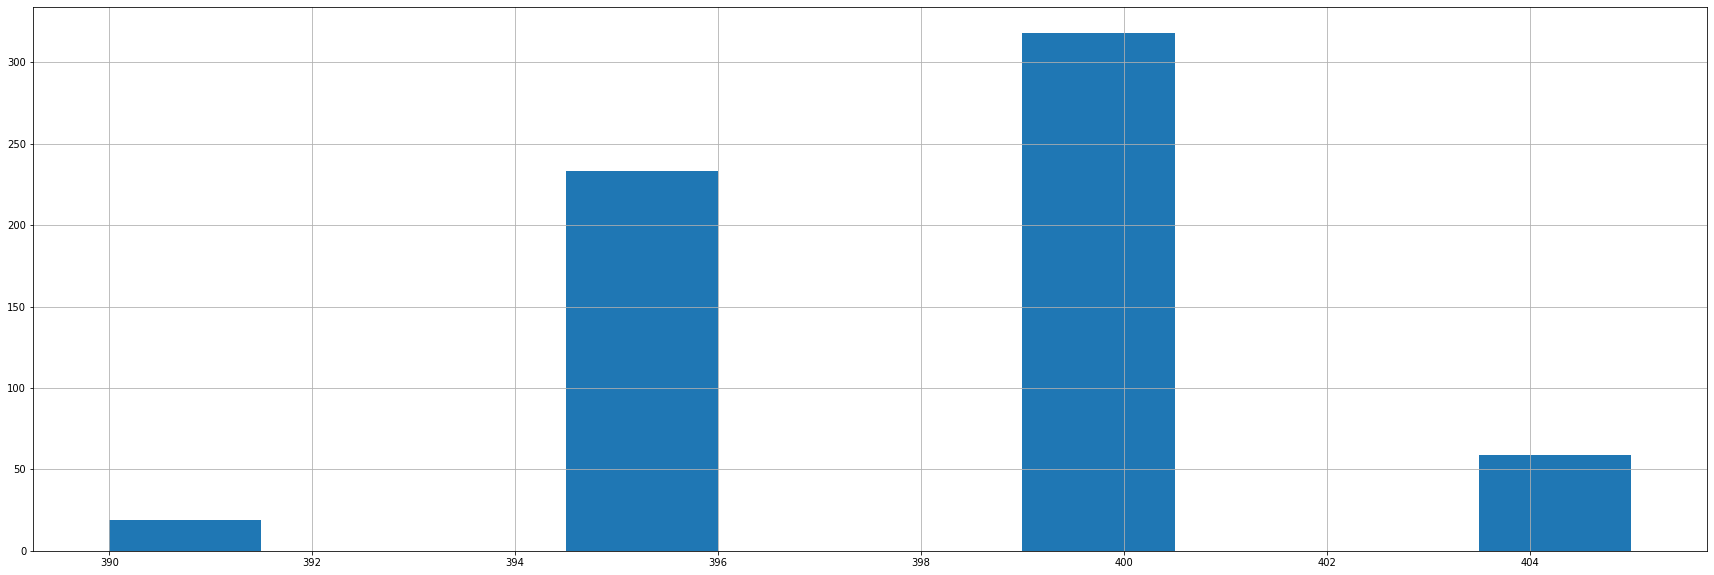

In [38]:
start = tiger_inv_ask - kodex_inv_bid
start.hist()
start = start.value_counts() 
print(start[:30])

In [ ]:
kodex_inv_bidask.plot()

# 시뮬레이션

In [39]:
profit = 0
profits = {}

kodex_inv = 100
tiger_inv = 100

init = 30

lev = 1

spread_start = list(map(int,start.index))
spread_finish = list(map(int,finish.index))


for j in spread_start[:30]:
    for k in spread_finish[:30]:
        if j + k <= 0:
            continue
        profit = 0
        t = 0
        check = None
        kodex_inv = 30
        tiger_inv = 30
        for i in range(len(bidask)):
            if bidask['kodex_inv_ask'].iloc[i] - bidask['tiger_inv_bid'].iloc[i] >= j and init <=tiger_inv<= init*2-lev:
                kodex_inv -= lev
                tiger_inv += lev
                profit += bidask['kodex_inv_ask'].iloc[i]*lev - bidask['tiger_inv_bid'].iloc[i]*lev
                print('shortstart',i,'번째거래 / ','  ask:',bidask['kodex_inv_ask'].iloc[i],'  bid:', bidask['tiger_inv_bid'].iloc[i],'  profit:',profit)
                t += 2
                check = 'short'
            if bidask['tiger_inv_ask'].iloc[i] - bidask['kodex_inv_bid'].iloc[i] >= k and tiger_inv > init and check == 'short':
                profit += bidask['tiger_inv_ask'].iloc[i]*(tiger_inv - init) - bidask['kodex_inv_bid'].iloc[i]*(tiger_inv-init)
                tiger_inv = init
                kodex_inv = init
                print('shortfinish',i,'번째거래 / ','  ask:',bidask['tiger_inv_ask'].iloc[i],'  bid:', bidask['kodex_inv_bid'].iloc[i],'  profit:',profit)       
                t += 2


            if bidask['tiger_inv_ask'].iloc[i] - bidask['kodex_inv_bid'].iloc[i] >= k and init<= kodex_inv<=init*2-lev:
                kodex_inv += lev
                tiger_inv -= lev
                profit += bidask['tiger_inv_ask'].iloc[i]*lev - bidask['kodex_inv_bid'].iloc[i]*lev
                print('longstart',i,'번째거래 / ','  ask:',bidask['tiger_inv_ask'].iloc[i],'  bid:', bidask['kodex_inv_bid'].iloc[i],'  profit:',profit)
                t += 2
                check = 'long'
            if bidask['kodex_inv_ask'].iloc[i] - bidask['tiger_inv_bid'].iloc[i] >= j and kodex_inv > init and check == 'long':
                profit += bidask['kodex_inv_ask'].iloc[i]*(kodex_inv - init) - bidask['tiger_inv_bid'].iloc[i]*(kodex_inv-init)
                tiger_inv = init
                kodex_inv = init
                print('longfinish',i,'번째거래 / ','  ask:',bidask['kodex_inv_ask'].iloc[i],'  bid:', bidask['tiger_inv_bid'].iloc[i],'  profit:',profit)       
                t += 2
        
        if check == 'short':
            profit += bidask['tiger_inv_ask'].iloc[-1]*(tiger_inv - init) - bidask['kodex_inv_bid'].iloc[-1]*(tiger_inv-init)
            print('shortfinish',i,'번째거래 / ','  ask:',bidask['tiger_inv_ask'].iloc[i],'  bid:', bidask['kodex_inv_bid'].iloc[i],'  profit:',profit) 
        if check == 'long':
            profit += bidask['kodex_inv_ask'].iloc[i]*(kodex_inv - init) - bidask['tiger_inv_bid'].iloc[i]*(kodex_inv-init)
            print('longfinish',i,'번째거래 / ','  ask:',bidask['kodex_inv_ask'].iloc[i],'  bid:', bidask['tiger_inv_bid'].iloc[i],'  profit:',profit)     

        profits[(j,k,t)] = profit - t*6
        print('-------------------------------------------------------------------------------------------------------------------')

profits = sorted(profits.items(), key=lambda x: x[1], reverse=True)
profits[:20]

longstart 0 번째거래 /    ask: 4370   bid: 3975   profit: 395
longstart 1 번째거래 /    ask: 4380   bid: 3975   profit: 800
longstart 2 번째거래 /    ask: 4370   bid: 3975   profit: 1195
longstart 3 번째거래 /    ask: 4380   bid: 3975   profit: 1600
longstart 4 번째거래 /    ask: 4380   bid: 3975   profit: 2005
longstart 5 번째거래 /    ask: 4380   bid: 3980   profit: 2405
longstart 6 번째거래 /    ask: 4380   bid: 3975   profit: 2810
longstart 7 번째거래 /    ask: 4370   bid: 3975   profit: 3205
longstart 8 번째거래 /    ask: 4380   bid: 3975   profit: 3610
longstart 9 번째거래 /    ask: 4370   bid: 3970   profit: 4010
longstart 10 번째거래 /    ask: 4370   bid: 3970   profit: 4410
longstart 11 번째거래 /    ask: 4370   bid: 3970   profit: 4810
longstart 12 번째거래 /    ask: 4370   bid: 3970   profit: 5210
longstart 13 번째거래 /    ask: 4370   bid: 3970   profit: 5610
longstart 14 번째거래 /    ask: 4375   bid: 3970   profit: 6015
longstart 15 번째거래 /    ask: 4370   bid: 3970   profit: 6415
longstart 16 번째거래 /    ask: 4375   bid: 3975   profi

[((405, -400, 60), -610)]

In [46]:
profit = 0
t = 0
check = None
kodex_inv =300
tiger_inv = 300

init = 300

lev = 100

j = -400
k = 405

for i in range(len(bidask)):
    if bidask['kodex_inv_ask'].iloc[i] - bidask['tiger_inv_bid'].iloc[i] >= j and init <=tiger_inv<= init*2-lev:
        kodex_inv -= lev
        tiger_inv += lev
        profit += bidask['kodex_inv_ask'].iloc[i]*lev - bidask['tiger_inv_bid'].iloc[i]*lev
        print('shortstart',i,'번째거래 / ','  ask:',bidask['kodex_inv_ask'].iloc[i],'  bid:', bidask['tiger_inv_bid'].iloc[i],'  profit:',profit)
        t += 2
        check = 'short'
    if bidask['tiger_inv_ask'].iloc[i] - bidask['kodex_inv_bid'].iloc[i] >= k and tiger_inv > init and check == 'short':
        profit += bidask['tiger_inv_ask'].iloc[i]*(tiger_inv - init) - bidask['kodex_inv_bid'].iloc[i]*(tiger_inv-init)
        tiger_inv = init
        kodex_inv = init
        print('shortfinish',i,'번째거래 / ','  ask:',bidask['tiger_inv_ask'].iloc[i],'  bid:', bidask['kodex_inv_bid'].iloc[i],'  profit:',profit)       
        t += 2


    if bidask['tiger_inv_ask'].iloc[i] - bidask['kodex_inv_bid'].iloc[i] >= k and init<= kodex_inv<=init*2-lev:
        kodex_inv += lev
        tiger_inv -= lev
        profit += bidask['tiger_inv_ask'].iloc[i]*lev - bidask['kodex_inv_bid'].iloc[i]*lev
        print('longstart',i,'번째거래 / ','  ask:',bidask['tiger_inv_ask'].iloc[i],'  bid:', bidask['kodex_inv_bid'].iloc[i],'  profit:',profit)
        t += 2
        check = 'long'
    if bidask['kodex_inv_ask'].iloc[i] - bidask['tiger_inv_bid'].iloc[i] >= j and kodex_inv > init and check == 'long':
        profit += bidask['kodex_inv_ask'].iloc[i]*(kodex_inv - init) - bidask['tiger_inv_bid'].iloc[i]*(kodex_inv-init)
        tiger_inv = init
        kodex_inv = init
        print('longfinish',i,'번째거래 / ','  ask:',bidask['kodex_inv_ask'].iloc[i],'  bid:', bidask['tiger_inv_bid'].iloc[i],'  profit:',profit)       
        t += 2

if check == 'short':
    profit += bidask['tiger_inv_ask'].iloc[-1]*(tiger_inv - init) - bidask['kodex_inv_bid'].iloc[-1]*(tiger_inv-init)
    print('shortfinish',i,'번째거래 / ','  ask:',bidask['tiger_inv_ask'].iloc[i],'  bid:', bidask['kodex_inv_bid'].iloc[i],'  profit:',profit) 
if check == 'long':
    profit += bidask['kodex_inv_ask'].iloc[i]*(kodex_inv - init) - bidask['tiger_inv_bid'].iloc[i]*(kodex_inv-init)
    print('longfinish',i,'번째거래 / ','  ask:',bidask['kodex_inv_ask'].iloc[i],'  bid:', bidask['tiger_inv_bid'].iloc[i],'  profit:',profit)     

print(profit - t*6)
print('-------------------------------------------------------------------------------------------------------------------')

longstart 1 번째거래 /    ask: 4380   bid: 3975   profit: 40500
longstart 3 번째거래 /    ask: 4380   bid: 3975   profit: 81000
longstart 4 번째거래 /    ask: 4380   bid: 3975   profit: 121500
longfinish 303 번째거래 /    ask: 3950   bid: 4350   profit: 1500
shortstart 320 번째거래 /    ask: 3945   bid: 4345   profit: -38500
shortstart 321 번째거래 /    ask: 3945   bid: 4345   profit: -78500
shortstart 396 번째거래 /    ask: 3940   bid: 4340   profit: -118500
shortfinish 444 번째거래 /    ask: 4380   bid: 3975   profit: 3000
longstart 444 번째거래 /    ask: 4380   bid: 3975   profit: 43500
longstart 455 번째거래 /    ask: 4375   bid: 3970   profit: 84000
longstart 503 번째거래 /    ask: 4375   bid: 3970   profit: 124500
longfinish 616 번째거래 /    ask: 3970   bid: 4370   profit: 4500
shortstart 621 번째거래 /    ask: 3980   bid: 4380   profit: -35500
shortstart 624 번째거래 /    ask: 3980   bid: 4380   profit: -75500
shortstart 626 번째거래 /    ask: 3985   bid: 4385   profit: -115500
shortfinish 628 번째거래 /    ask: 4390   bid: 3990   profit: 4